In [1]:
import pandas as pd

AMOUNT_OF_DATA = 160000 # If it takes to long, make this number smaller (:

dataset = pd.read_csv(
    "data/final.csv"
)[:AMOUNT_OF_DATA].drop(columns=["id"]) # ID won't be usefull during training, so just dropping it.

print(dataset.head())

   store_nbr      family  sales  onpromotion  dcoilwtico   type_x type_y  \
0          1  AUTOMOTIVE    0.0            0       93.14  Holiday      D   
1          1   BABY CARE    0.0            0       93.14  Holiday      D   
2          1      BEAUTY    0.0            0       93.14  Holiday      D   
3          1   BEVERAGES    0.0            0       93.14  Holiday      D   
4          1       BOOKS    0.0            0       93.14  Holiday      D   

   cluster  
0       13  
1       13  
2       13  
3       13  
4       13  


In [2]:
from sklearn.model_selection import train_test_split

# Seperating the dataset into X, Y and then splitting that into a test and a train set 
X = dataset.drop('sales', axis=1)
y = dataset['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# The oil dataset is not completely filled, so we fill it in with the mean oil price
X_train['dcoilwtico'] = X_train['dcoilwtico'].fillna(X_train['dcoilwtico'].mean())
X_test['dcoilwtico'] = X_test['dcoilwtico'].fillna(X_train['dcoilwtico'].mean())

X_train = pd.get_dummies(X_train, columns=['family', 'type_x', 'type_y'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['family', 'type_x', 'type_y'], drop_first=True)

print(X_train.head())
print(X_test.head())

        store_nbr  onpromotion  dcoilwtico  cluster  family_BABY CARE  \
32619          24            0   94.309151        1                 0   
119593         15            0   94.309151       15                 1   
123044         11            0   92.070000        6                 0   
84426          28            0   94.309151       10                 0   
127627          4            0   92.470000        9                 0   

        family_BEAUTY  family_BEVERAGES  family_BOOKS  family_BREAD/BAKERY  \
32619               0                 0             0                    0   
119593              0                 0             0                    0   
123044              0                 0             0                    0   
84426               0                 0             0                    0   
127627              0                 0             0                    0   

        family_CELEBRATION  ...  family_POULTRY  family_PREPARED FOODS  \
32619             

Another problem with the dataset is that some of the numbers are not between 0 and 1, which the program expects, welp... that's where the standardScaler comes in. It very simply just makes the numbers between them. We could write our own code for this, but the internet told me to do this, so I will.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['dcoilwtico', 'onpromotion', 'store_nbr', 'cluster']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# LinearRegression

Very simple linear model. I am not sure how it takes the class labels into account, but I assume it just sees each possible label as it's own axis (so in that case we would have 45 axis).

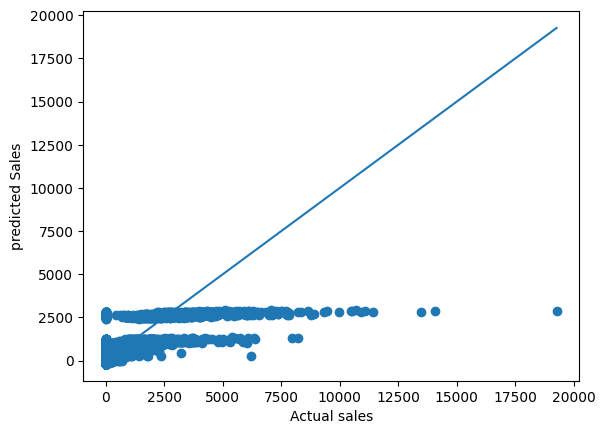

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# print(y_pred)
# print(y_test.head())

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual sales")
plt.ylabel("predicted Sales")
plt.plot([0, max(y_test)], [0, max(y_test)])
plt.show()


# K-nearest neighbour

So, since sklearn is actually really easy to use, this wasn't hard to implement. Just for fun I made a forloop that goes trough a few of the K values. 

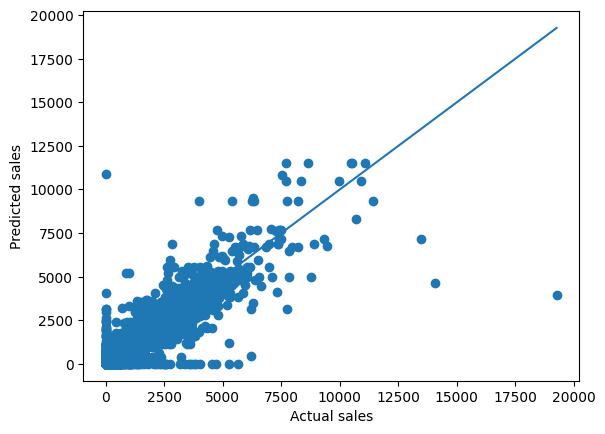

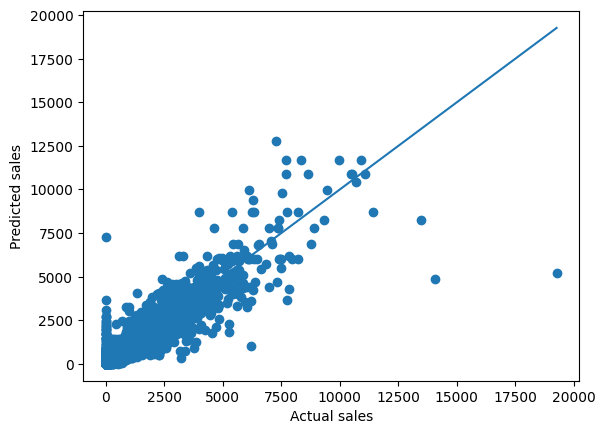

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

testList = [1, 3, 5, 7]

for i in testList:
    model = KNeighborsRegressor(n_neighbors=i)

    model.fit(X_train, y_train)

    predicted_values = model.predict(X_test)

    import matplotlib.pyplot as plt

    plt.figure()
    plt.scatter(y_test, predicted_values)
    plt.xlabel("Actual sales")
    plt.ylabel("Predicted sales")
    plt.plot([0, max(y_test)], [0, max(y_test)]) # guideline thingy
    plt.show()